In [1]:
using LinearAlgebra # need this to do the cross product
using PyPlot # Using Plots http://docs.juliaplots.org/latest/install/
# https://gist.github.com/gizmaa/7214002 - examples uing PyPlot in Julia

In [41]:
e = 1.602176634e-19
#m_e = 9.1093837015e-31
m_Ag = 107.9*1.66e-27
gyro =  e/(2.0*m)
mu_e=1.85480201566e-23;
mu_B = 9.27400968e-24;

First set up a SG experiment with field in z direction and fire beam along x direction

In [35]:
machine_dim_x = 0.1
machine_dim_y = 0.035
machine_dim_z = 0.1

B0 = 1.4
gradB0 = 1800;

In [49]:
2*pi/(gyro*B0)

5.103409646968872e-11

In [67]:
function B(r)
    B = zeros(3)
    B[1] = -gradB0*r[1]
    B[3] = B0 + gradB0*r[3]
    return B
end;

In [68]:
function gradB(r)
    gradB = zeros(3,3)
    gradB[3,3] = gradB0
    gradB[1,1] = -gradB0
    return gradB
end;

In [69]:
v0 = 600.0
dt = 5.0e-12
t_max = machine_dim_y/v0
times = collect(0:dt:t_max)

mu = [0.0,1/sqrt(2),1/sqrt(2)]*mu_e
r = [0,0,0]
v = [0,v0,0]
r_save = zeros(length(times),3)
mu_save = zeros(length(times),3);

In [70]:
# evolution for mu inspired by https://www.particleincell.com/2011/vxb-rotation/
for (i,t) in enumerate(times)
    
    r_save[i,:] = r
    mu_save[i,:] = mu
    
    v += (0.5*dt*(mu'*gradB(r))/m_Ag)'
    Br = B(r)
    s = 2.0/(1+(norm(Br)*gyro*dt*0.5)^2)
    mu_prime = mu + 0.5*dt*gyro*cross(mu,Br)
    mu += 0.5*dt*gyro*s*cross(mu_prime,Br)
    r += dt*v
    v += (0.5*dt*(mu'*gradB(r))/m_Ag)'
    

end

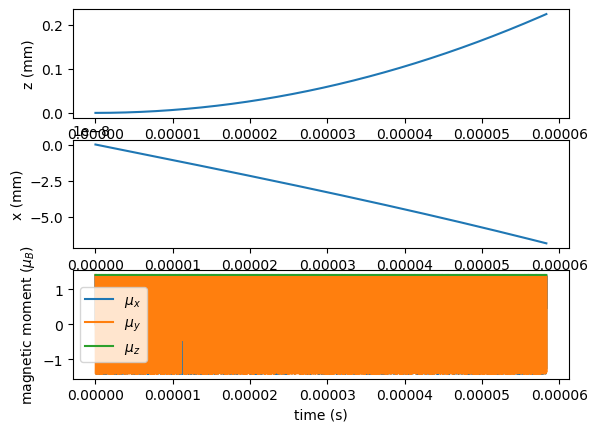

In [82]:
subplot(311)
plot(times[1:1000:end],(r_save[1:1000:end,3]./1e-3), label="z");
ylabel("z (mm)")

subplot(312)
plot(times[1:1000:end],(r_save[1:1000:end,1]./1e-3), label="x");
ylabel("x (mm)")

subplot(313)
plot(times[1:1000:end],mu_save[1:1000:end,1]./mu_B, label=L"$\mu_x$")
plot(times[1:1000:end],mu_save[1:1000:end,2]./mu_B, label=L"$\mu_y$")
plot(times[1:1000:end],mu_save[1:1000:end,3]./mu_B, label=L"$\mu_z$")
xlabel("time (s)")
ylabel(L"magnetic moment ($\mu_B$)")
legend();

Now let's imagine we take the output of the first SG experiment and put it into another one rotated 90 degrees so that the field is in y. The B field parameters are still the same, but we need to redefine out B and gradB functions:

In [32]:
function B(r)
    B = zeros(3)
    B[2] = Bmin + deltaB*r[2]/machine_dim_z
    return B
end;

In [33]:
function gradB(r)
    gradB = zeros(3,3)
    gradB[2,2] = gradB0
    return gradB
end;

In [34]:
r_save_2 = zeros(length(times),3)
mu_save_2 = zeros(length(times),3);

In [35]:
for (i,t) in enumerate(times)
    
    r_save_2[i,:] = r
    mu_save_2[i,:] = mu
    
    v += (0.5*dt*(mu'*gradB(r))/m_Ag)'
    Br = B(r)
    s = 2.0/(1+(norm(Br)*gyro*dt*0.5)^2)
    mu_prime = mu + 0.5*dt*gyro*cross(mu,Br)
    mu += 0.5*dt*gyro*s*cross(mu_prime,Br)
    r += dt*v
    v += (0.5*dt*(mu'*gradB(r))/m_Ag)'
    

end

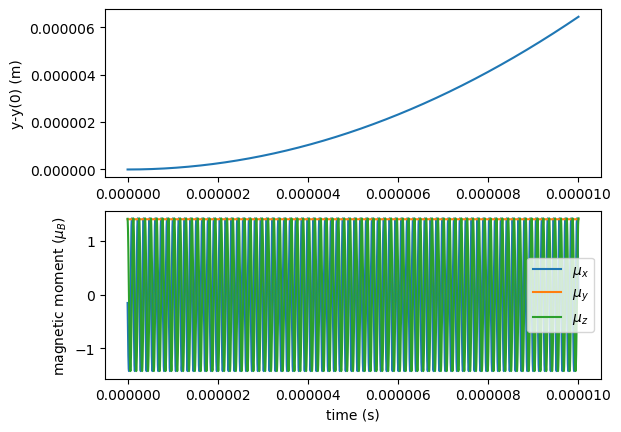

In [39]:
subplot(211)
plot(times,(r_save_2[:,2].-r_save_2[1,2]), label="y");
ylabel("y-y(0) (m)")

subplot(212)
plot(times,mu_save_2[:,1]./mu_B, label=L"$\mu_x$")
plot(times,mu_save_2[:,2]./mu_B, label=L"$\mu_y$")
plot(times,mu_save_2[:,3]./mu_B, label=L"$\mu_z$")
xlabel("time (s)")
ylabel(L"magnetic moment ($\mu_B$)")
legend();